# Notebook for Spotify Data Analysis

# Load and View Dataset

In [16]:
from custom_utils import load_and_concatenate_parquet_files
original_data = load_and_concatenate_parquet_files('data/preprocessed_spotify_data')
display(original_data.head())
display(original_data.describe())

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06,2.026473e+06
mean,1.863450e+01,2.005755e+03,5.492973e-01,5.904814e-01,5.256533e+00,-9.795338e+00,6.422538e-01,1.010607e-01,3.712684e-01,2.205951e-01,2.162731e-01,4.809771e-01,1.200594e+02,2.384983e+05,3.878301e+00
std,1.686051e+01,1.755512e+01,1.818993e-01,2.707491e-01,3.549280e+00,5.790547e+00,4.793370e-01,1.520087e-01,3.598970e-01,3.516920e-01,1.927264e-01,2.694079e-01,2.995870e+01,1.402839e+05,4.829841e-01
min,0.000000e+00,1.886000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,3.000000e+00,2.002000e+03,4.280000e-01,3.870000e-01,2.000000e+00,-1.216900e+01,0.000000e+00,3.600000e-02,2.070000e-02,0.000000e+00,9.790000e-02,2.550000e-01,9.700100e+01,1.751770e+05,4.000000e+00
50%,1.500000e+01,2.011000e+03,5.650000e-01,6.220000e-01,5.000000e+00,-8.327000e+00,1.000000e+00,4.880000e-02,2.490000e-01,4.290000e-04,1.330000e-01,4.740000e-01,1.200100e+02,2.185870e+05,4.000000e+00
75%,3.000000e+01,2.018000e+03,6.860000e-01,8.250000e-01,8.000000e+00,-5.810000e+00,1.000000e+00,8.810000e-02,7.200000e-01,4.200000e-01,2.790000e-01,7.020000e-01,1.382360e+02,2.739580e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.990000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


# Data Analysis

# Artists

### General Facts

In [17]:
print(f"Total Number of Artists: {original_data['artist_name'].nunique()}")
print(original_data['artist_name'].value_counts().reset_index().head(10))
print(f"\nMean songs per artist: {original_data['artist_name'].value_counts().mean()}")
print(f"Median songs per artist: {original_data['artist_name'].value_counts().median()}")

Total Number of Artists: 143587
               artist_name  count
0    Johann Sebastian Bach   6451
1              Traditional   4658
2             Die drei ???   3856
3  Wolfgang Amadeus Mozart   3480
4         Francisco Canaro   2703
5          Lata Mangeshkar   2662
6            Grateful Dead   2562
7     Ludwig van Beethoven   2263
8              Johnny Cash   2027
9            Elvis Presley   2022

Mean songs per artist: 14.113206627340915
Median songs per artist: 3.0


#### Artists / Popularity

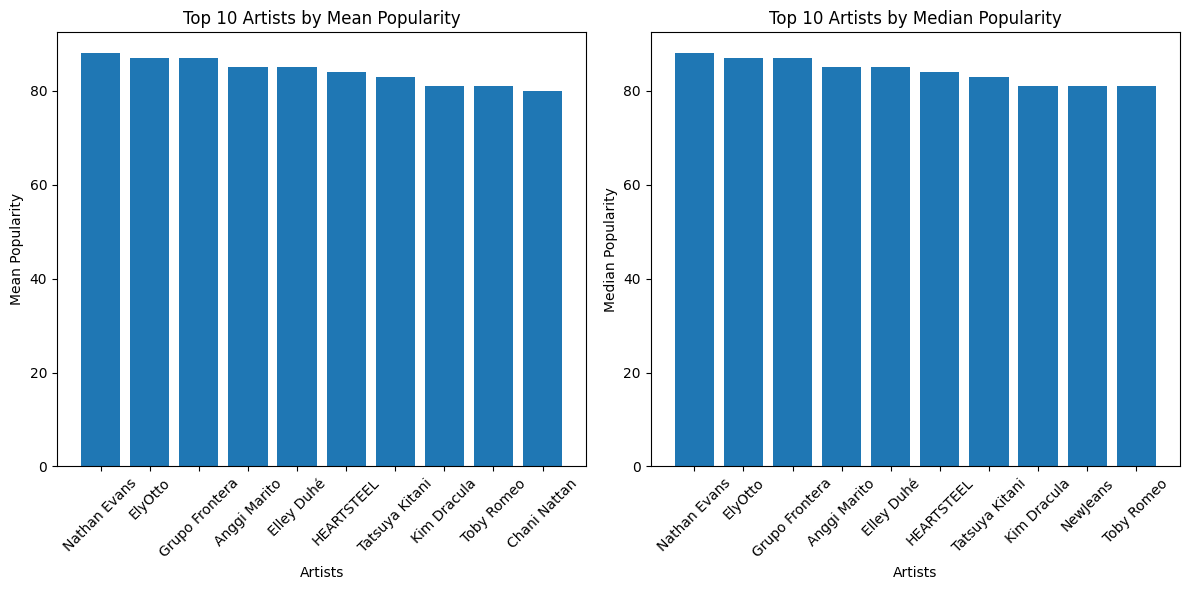

In [18]:
import matplotlib.pyplot as plt

data_copy = original_data.copy()

artist_mean = data_copy.groupby('artist_name')['popularity'].mean().reset_index()
artist_median = data_copy.groupby('artist_name')['popularity'].median().reset_index()

artist_mean.rename(columns={'popularity': 'artist_mean_popularity'}, inplace=True)
artist_median.rename(columns={'popularity': 'artist_median_popularity'}, inplace=True)

data_copy = data_copy.merge(artist_mean, on='artist_name', how='left')
data_copy = data_copy.merge(artist_median, on='artist_name', how='left')

top_10_artists_mean = artist_mean.nlargest(10, 'artist_mean_popularity')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_10_artists_mean['artist_name'], top_10_artists_mean['artist_mean_popularity'])
plt.xlabel('Artists')
plt.ylabel('Mean Popularity')
plt.title('Top 10 Artists by Mean Popularity')
plt.xticks(rotation=45)

top_10_artists_median = artist_median.nlargest(10, 'artist_median_popularity')
plt.subplot(1, 2, 2)
plt.bar(top_10_artists_median['artist_name'], top_10_artists_median['artist_median_popularity'])
plt.xlabel('Artists')
plt.ylabel('Median Popularity')
plt.title('Top 10 Artists by Median Popularity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Genres

### General Facts

In [19]:
print(f"Total Number of Genres: {original_data['genre'].nunique()}")
print(original_data['genre'].value_counts().reset_index().head(10))
print(f"\nMean songs per genre: {original_data['genre'].value_counts().mean()}")
print(f"Median songs per genre: {original_data['genre'].value_counts().median()}")
print(f"Genre with least songs: {original_data['genre'].value_counts().idxmin()}: {original_data['genre'].value_counts().min()}")

Total Number of Genres: 82
         genre  count
0  black-metal  21837
1       gospel  21621
2      ambient  21389
3     acoustic  21097
4     alt-rock  20918
5          emo  20845
6       indian  20583
7        k-pop  20004
8      new-age  19911
9        blues  19682

Mean songs per genre: 14143.268292682927
Median songs per genre: 15167.0
Genre with least songs: songwriter: 589


#### Genres / Popularity

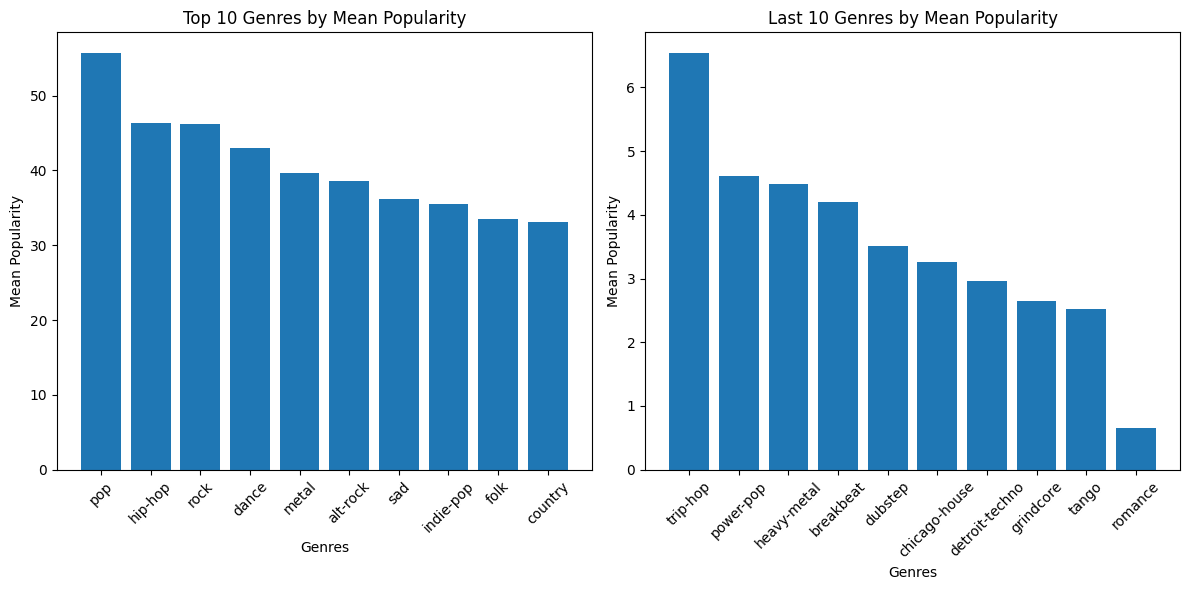

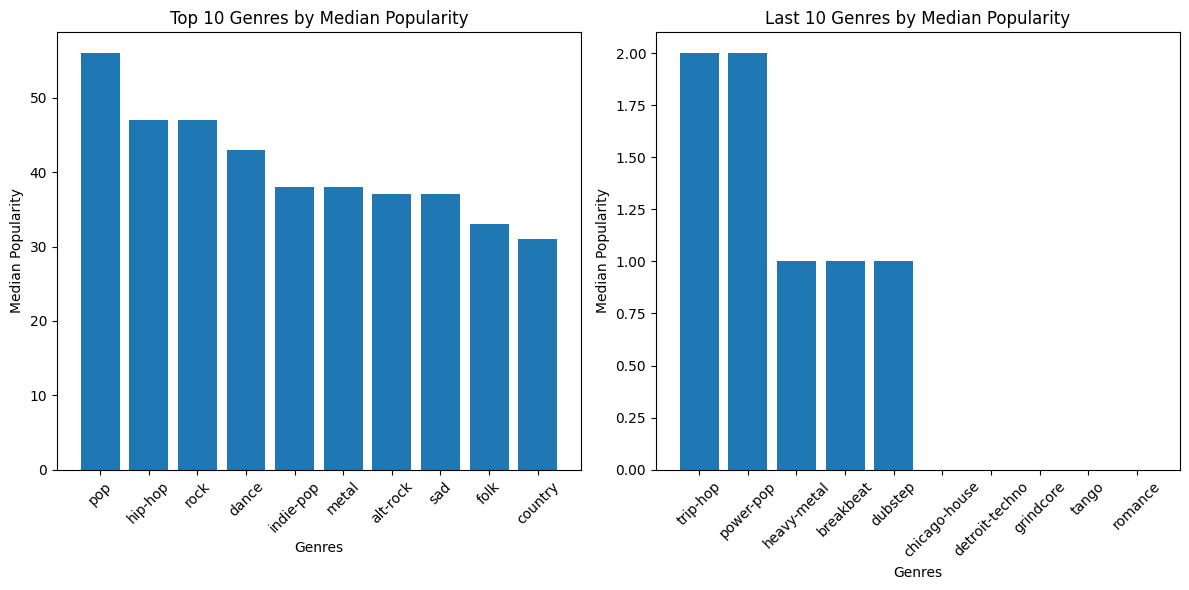

In [20]:
import matplotlib.pyplot as plt

genre_mean = data_copy.groupby('genre')['popularity'].mean().reset_index()
genre_median = data_copy.groupby('genre')['popularity'].median().reset_index()

genre_mean.rename(columns={'popularity': 'genre_mean_popularity'}, inplace=True)
genre_median.rename(columns={'popularity': 'genre_median_popularity'}, inplace=True)

data_copy = data_copy.merge(genre_mean, on='genre', how='left')
data_copy = data_copy.merge(genre_median, on='genre', how='left')

top_10_genres_mean = genre_mean.nlargest(10, 'genre_mean_popularity')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_10_genres_mean['genre'], top_10_genres_mean['genre_mean_popularity'])
plt.xlabel('Genres')
plt.ylabel('Mean Popularity')
plt.title('Top 10 Genres by Mean Popularity')
plt.xticks(rotation=45)

last_10_genres_mean = genre_mean.nsmallest(10, 'genre_mean_popularity')
plt.subplot(1, 2, 2)
plt.bar(last_10_genres_mean['genre'], last_10_genres_mean['genre_mean_popularity'])
plt.xlabel('Genres')
plt.ylabel('Mean Popularity')
plt.title('Last 10 Genres by Mean Popularity')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

top_10_genres_median = genre_median.nlargest(10, 'genre_median_popularity')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_10_genres_median['genre'], top_10_genres_median['genre_median_popularity'])
plt.xlabel('Genres')
plt.ylabel('Median Popularity')
plt.title('Top 10 Genres by Median Popularity')
plt.xticks(rotation=45)

last_10_genres_median = genre_median.nsmallest(10, 'genre_median_popularity')
plt.subplot(1, 2, 2)
plt.bar(last_10_genres_mean['genre'], last_10_genres_median['genre_median_popularity'])
plt.xlabel('Genres')
plt.ylabel('Median Popularity')
plt.title('Last 10 Genres by Median Popularity')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

### Genre over time

In [21]:
import plotly.express as px

genre_year_counts = original_data.groupby(['year', 'genre'])['track_id'].count().reset_index()
fig = px.line(genre_year_counts, x='year', y='track_id', color='genre', title='Number of Tracks for Each Genre per Year')
fig.show()

## Music Features

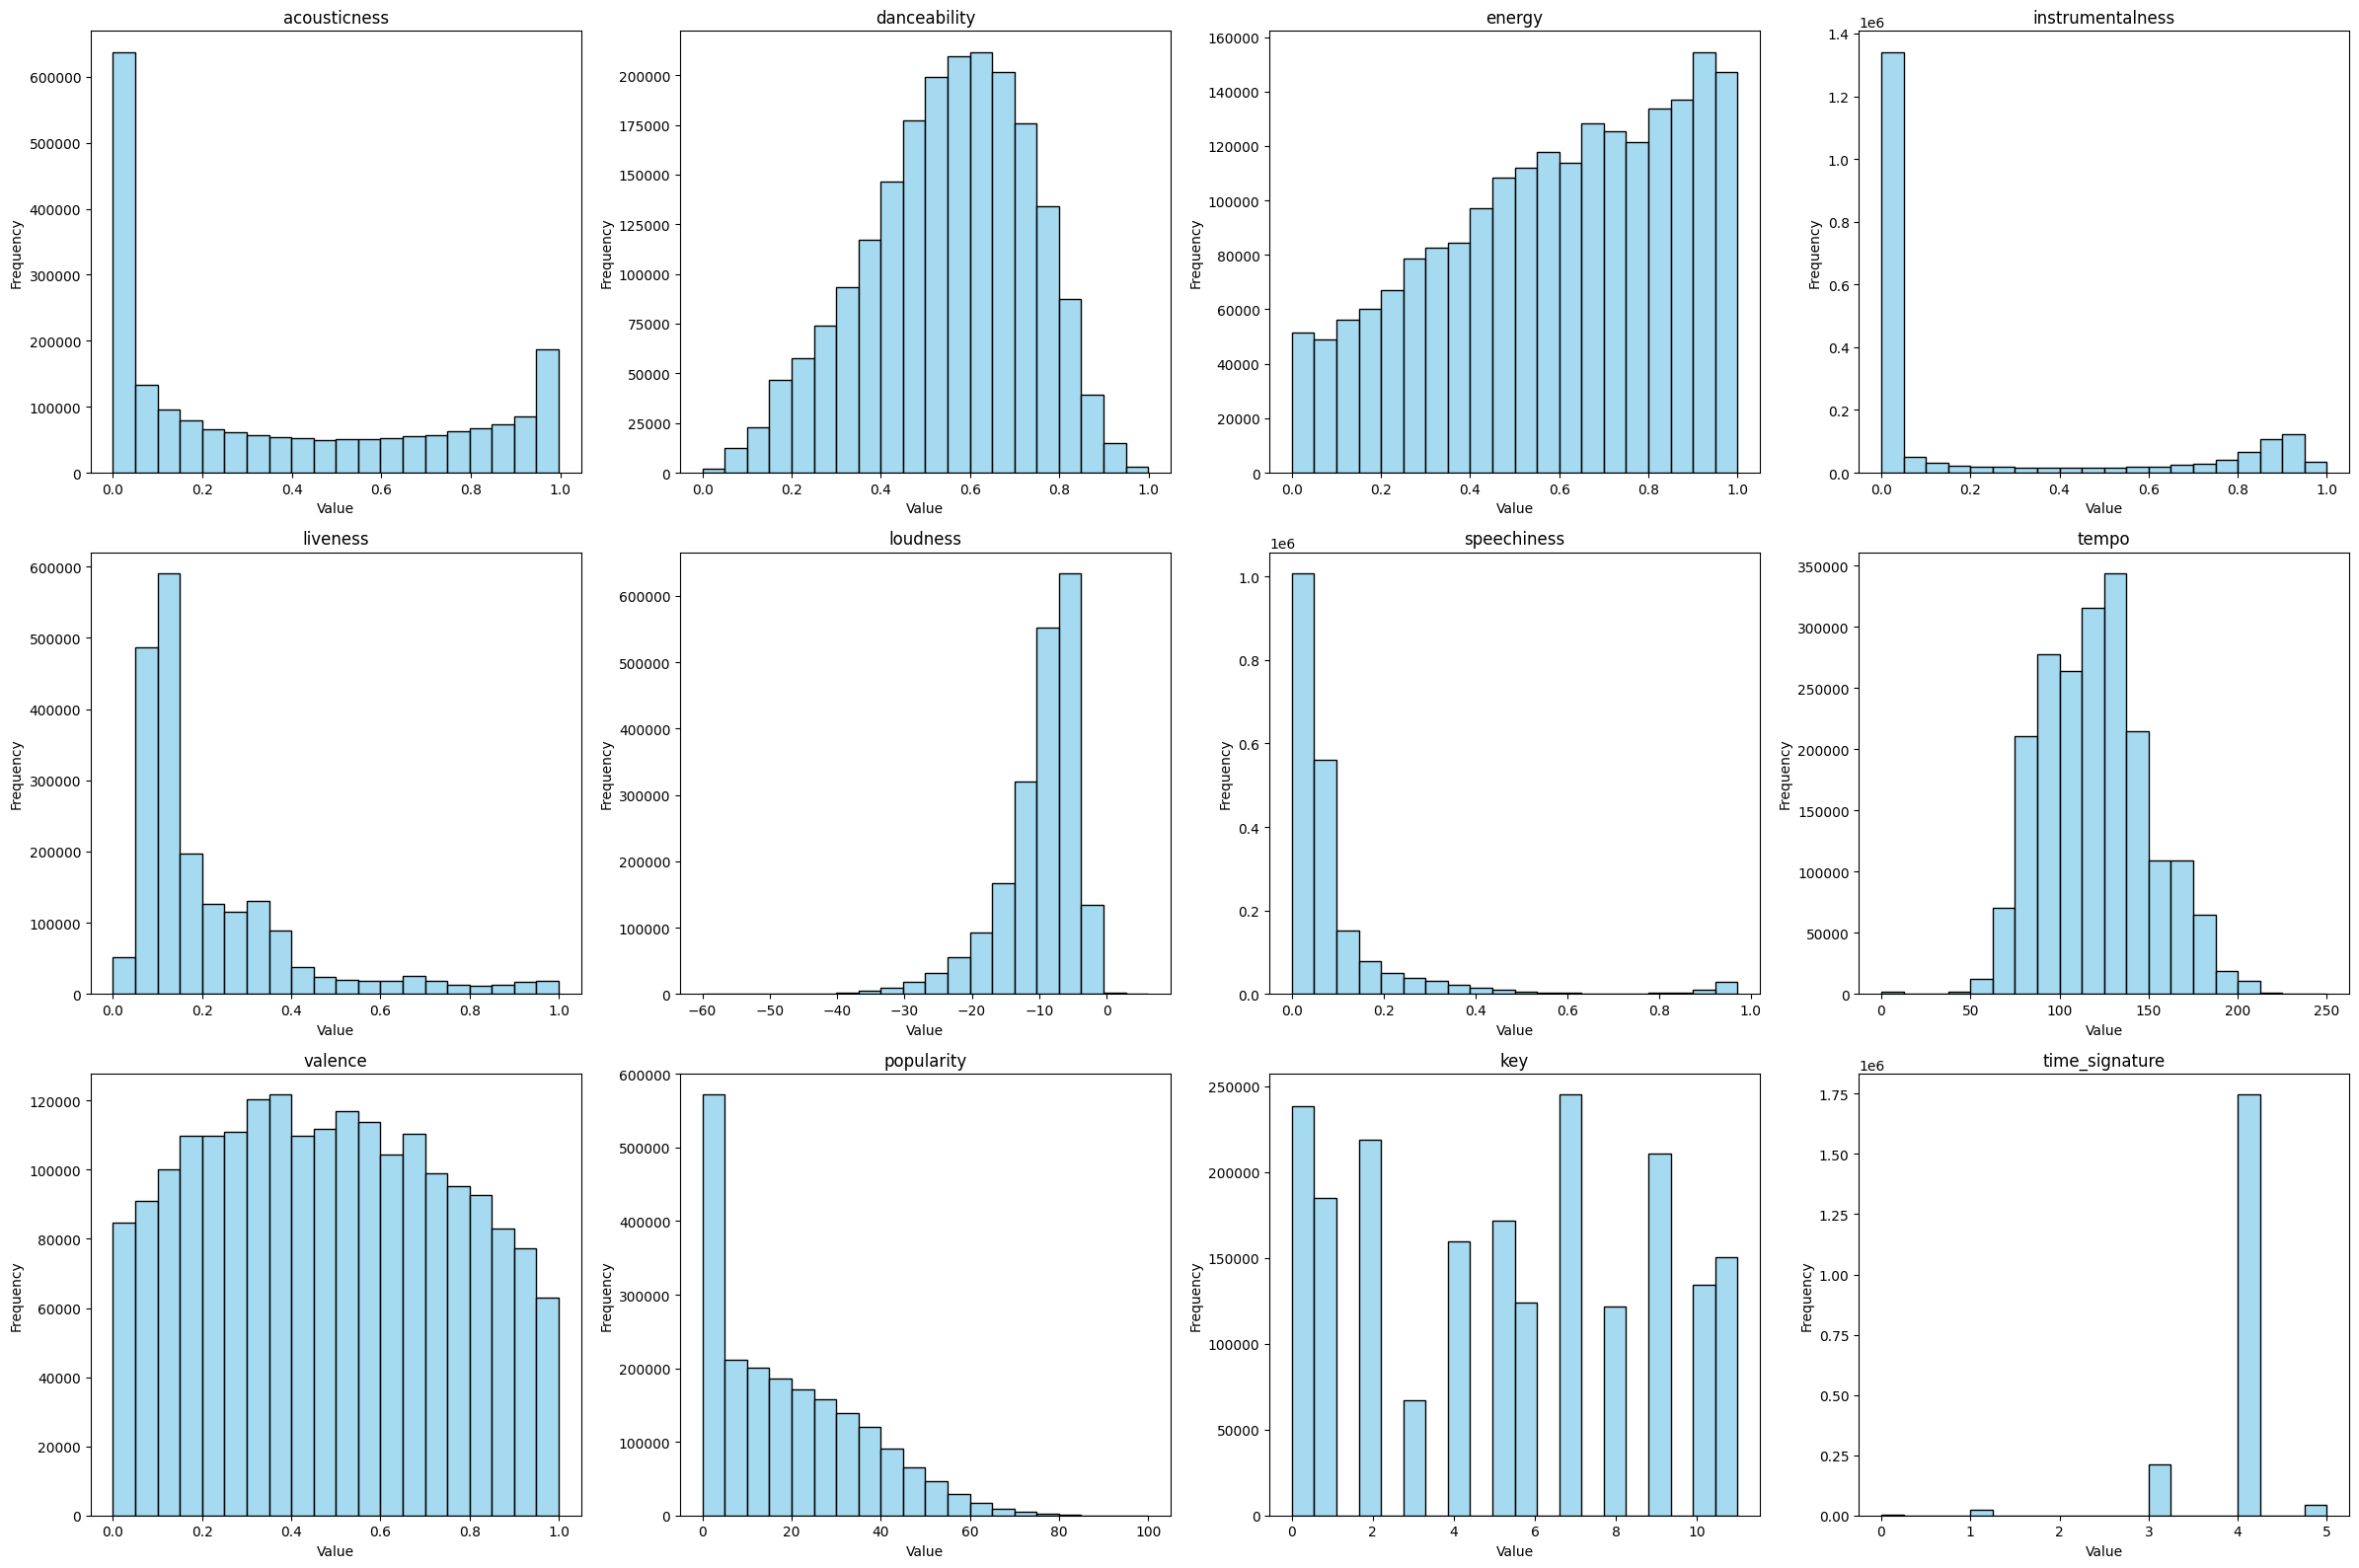

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = original_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', "popularity", "key", "time_signature"]]

fig, axes = plt.subplots(3, 4, figsize=(24,16))


for i, column in enumerate(numeric_columns.columns):
    sns.histplot(original_data[column], bins=20, color='skyblue', edgecolor='black', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(column)
    axes[i//4, i%4].set_xlabel('Value')
    axes[i//4, i%4].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Distribution of Song Duration

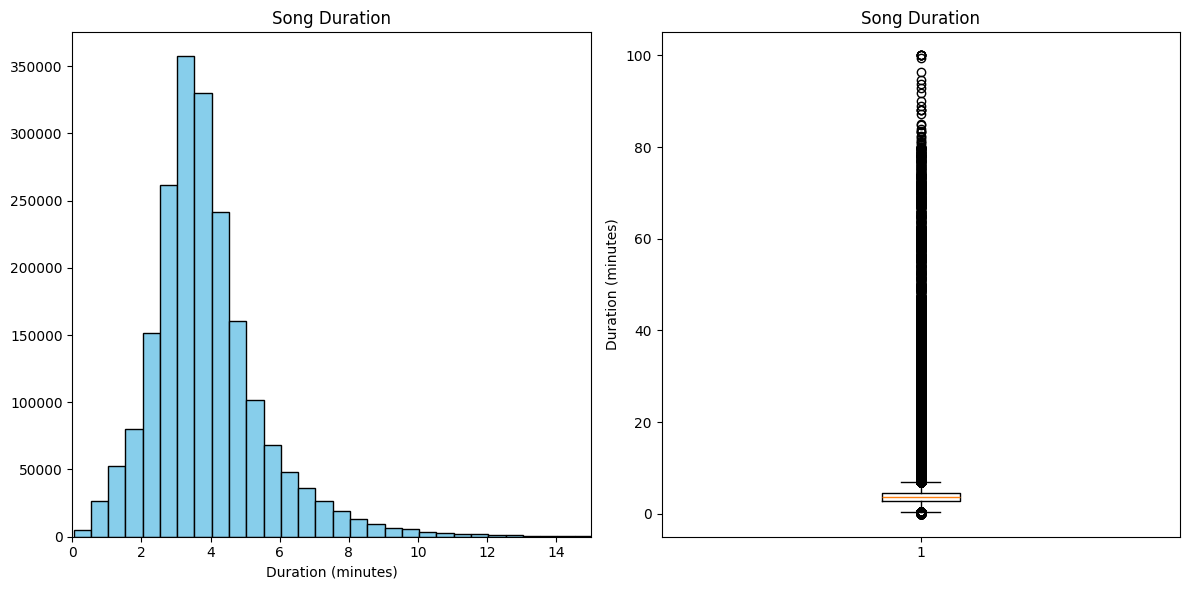

In [23]:
import matplotlib.pyplot as plt

new_plot_data = original_data.copy()
new_plot_data['minutes'] = new_plot_data['duration_ms'] / 60000

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(new_plot_data['minutes'], bins=200, color='skyblue', edgecolor='black')
axes[0].set_title('Song Duration')
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_xlim(0, 15)

axes[1].boxplot(new_plot_data['minutes'])
axes[1].set_title('Song Duration')
axes[1].set_ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

### Distribution of Mode (Minor or Major)

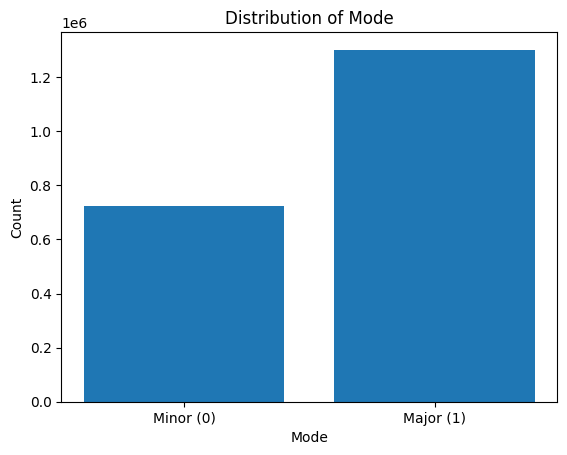

In [24]:
import matplotlib.pyplot as plt

mode_counts = data_copy['mode'].value_counts()

plt.bar(mode_counts.index, mode_counts.values)
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Distribution of Mode')

plt.xticks([0, 1], ['Minor (0)', 'Major (1)'])
plt.show()

## Features over time

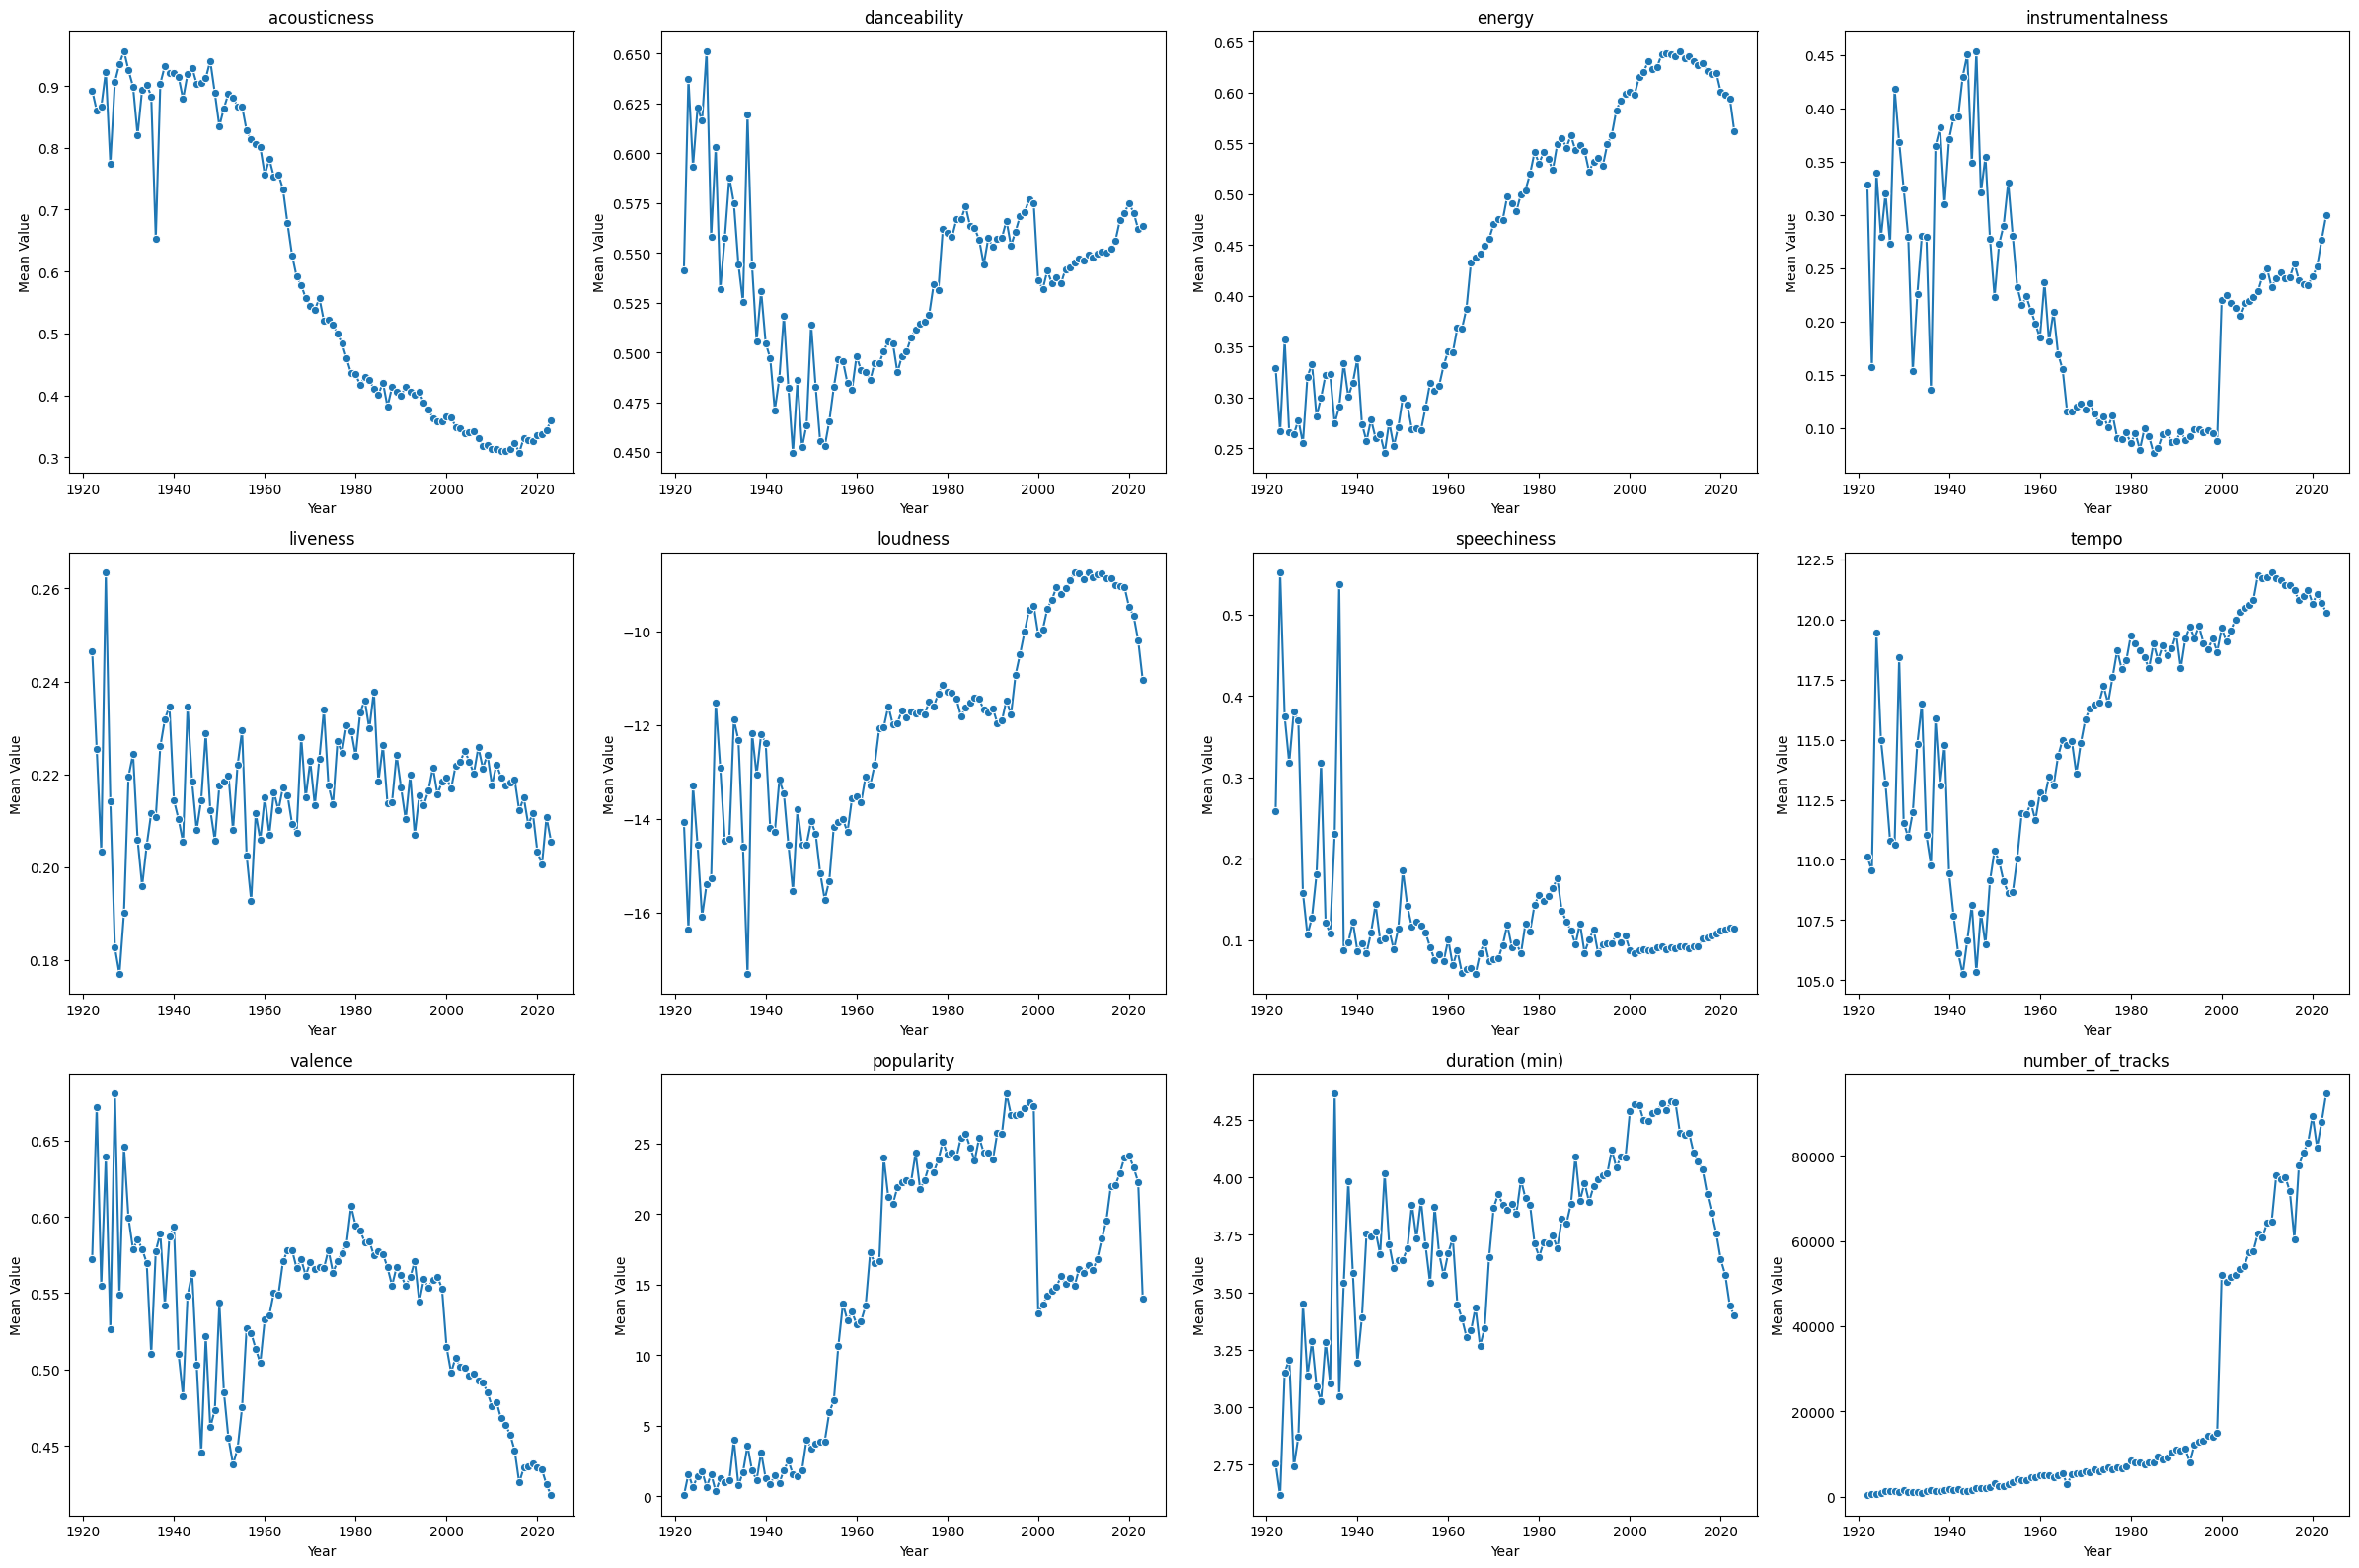

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

new_plot_data = original_data.copy()
new_plot_data['duration (min)'] = new_plot_data['duration_ms'] / 60000
new_plot_data['number_of_tracks'] = new_plot_data.groupby('year')['year'].transform('count')

feature_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                   'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 
                   'popularity', 'duration (min)', 'number_of_tracks']

numeric_columns = new_plot_data[feature_columns + ['year']]
yearly_means = numeric_columns.groupby("year").mean().reset_index()

filtered_data = yearly_means[yearly_means['year'] > 1920]

fig, axes = plt.subplots(3, 4, figsize=(24, 16))

for i, column in enumerate(feature_columns):
    sns.lineplot(x='year', y=column, data=filtered_data, ax=axes[i//4, i%4], marker='o')
    axes[i//4, i%4].set_title(column)
    axes[i//4, i%4].set_xlabel('Year')
    axes[i//4, i%4].set_ylabel('Mean Value')

plt.tight_layout()
plt.show()

### Outlier in Features

Number of outliers in danceability: 2003
Number of outliers in energy: 0
Number of outliers in speechiness: 267960
Number of outliers in acousticness: 0
Number of outliers in instrumentalness: 0
Number of outliers in liveness: 155835
Number of outliers in valence: 0
Number of outliers in popularity: 7097
Number of outliers in tempo: 13165
Number of outliers in loudness: 97436


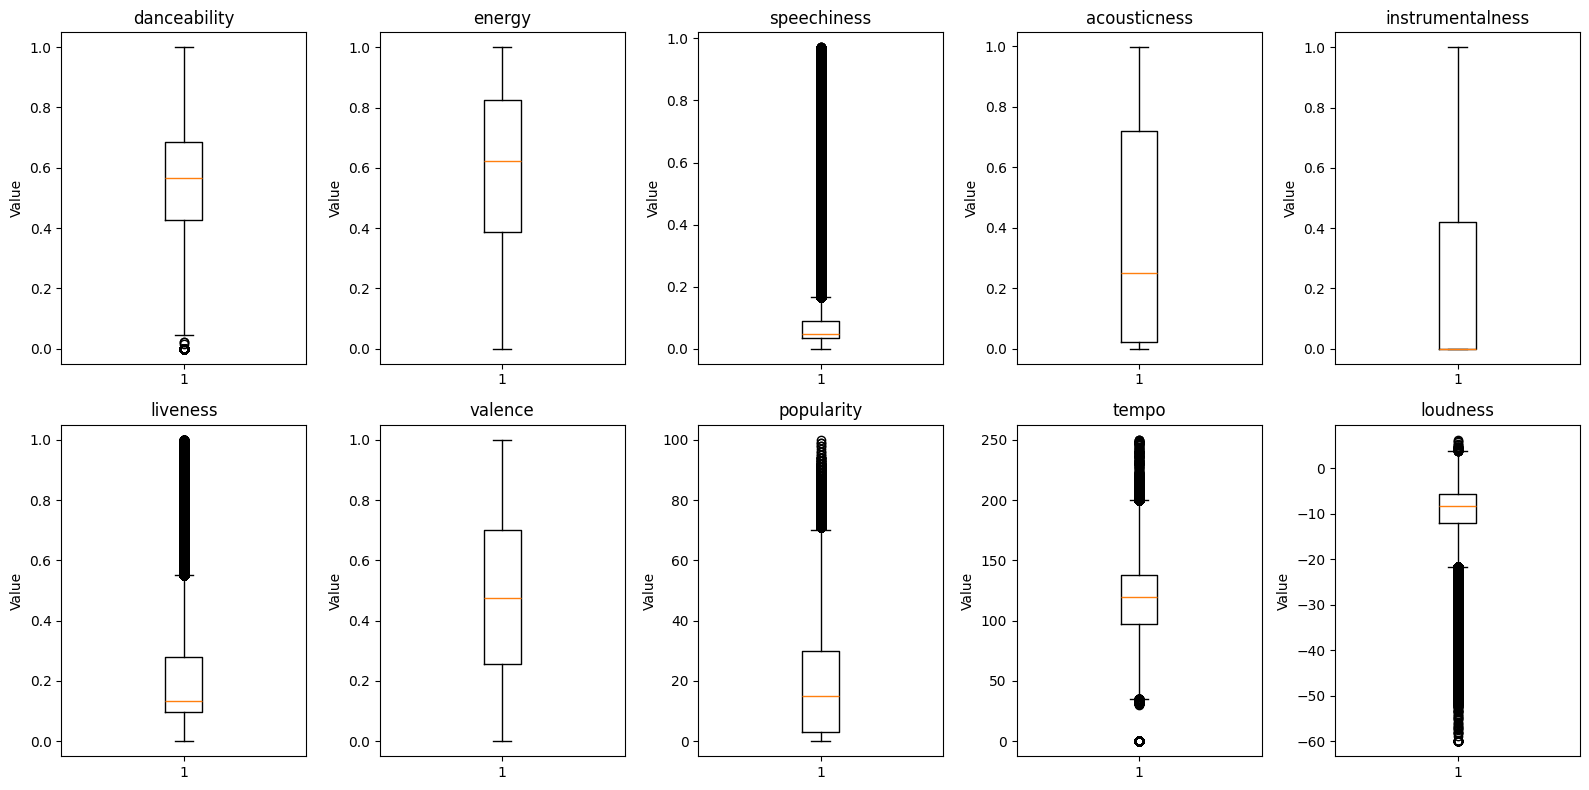

In [26]:
import matplotlib.pyplot as plt

numeric_columns = original_data[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'popularity', "tempo", "loudness"]]

fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.flatten()

for i, column in enumerate(numeric_columns.columns):
    axes[i].boxplot(numeric_columns[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Value')

plt.tight_layout()

outliers = []
for column in numeric_columns.columns:
    q1 = numeric_columns[column].quantile(0.25)
    q3 = numeric_columns[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_outliers = len(numeric_columns[(numeric_columns[column] < lower_bound) | (numeric_columns[column] > upper_bound)])
    outliers.append((column, num_outliers))

# Print the number of outliers for each column
for column, num_outliers in outliers:
    print(f"Number of outliers in {column}: {num_outliers}")
plt.show()

## Genres against Features

### Valence, Energy, Danceability

In [27]:
import plotly.graph_objs as go

temp_df = original_data[['genre', 'danceability', 'energy', 'valence']]

average_data = temp_df.groupby('genre').mean().reset_index()

trace = go.Scatter3d(
    x=average_data['danceability'],
    y=average_data['energy'],
    z=average_data['valence'],
    mode='markers',
    marker=dict(
        size=5,
        color=average_data['genre'].astype('category').cat.codes,
        colorscale='Viridis',
        opacity=0.8
    ),
    text=average_data['genre']
)

layout = go.Layout(
    title='3D Scatter Plot of Track Genres (Average)',
    scene=dict(
        xaxis=dict(title='Average Danceability'),
        yaxis=dict(title='Average Energy'),
        zaxis=dict(title='Average Valence')
    )
)

fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    width=1200,
    height=1200,
    scene=dict(
        aspectmode='cube'
    )
)

fig.update_traces(marker=dict(color=average_data['danceability'], 
                              colorscale='Viridis', 
                              cmin=average_data['danceability'].min(), 
                              cmax=average_data['danceability'].max()),
                  selector=dict(mode='markers'))

fig.update_traces(hovertemplate='<b>Genre:</b> %{text}<br>'
                                '<b>Average Danceability:</b> %{x}<br>'
                                '<b>Average Energy:</b> %{y}<br>'
                                '<b>Average Valence:</b> %{z}<br>',
                    selector=dict(type='scatter3d'))

fig.show()

### Speechiness, Tempo, Loudness

In [28]:
import plotly.graph_objs as go

temp_df = original_data[['genre', 'speechiness', 'tempo', 'loudness']]

temp_df = temp_df[temp_df['genre'] != "comedy"]

average_data = temp_df.groupby('genre').mean().reset_index()

trace = go.Scatter3d(
    x=average_data['speechiness'],
    y=average_data['tempo'],
    z=average_data['loudness'],
    mode='markers',
    marker=dict(
        size=5,
        color=average_data['genre'].astype('category').cat.codes,
        colorscale='Viridis',
        opacity=0.8
    ),
    text=average_data['genre']
)

layout = go.Layout(
    title='3D Scatter Plot of Track Genres (Average)',
    scene=dict(
        xaxis=dict(title='Average Speechiness'),
        yaxis=dict(title='Average Tempo'),
        zaxis=dict(title='Average Loudness')
    )
)

fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    width=1200,
    height=1200,
    scene=dict(
        aspectmode='cube'
    )
)

fig.update_traces(marker=dict(color=average_data['tempo'], 
                              colorscale='Viridis', 
                              cmin=average_data['tempo'].min(), 
                              cmax=average_data['tempo'].max()),
                  selector=dict(mode='markers'))

fig.update_traces(hovertemplate='<b>Genre:</b> %{text}<br>'
                                '<b>Average Speechiness:</b> %{x}<br>'
                                '<b>Average Tempo:</b> %{y}<br>'
                                '<b>Average Loudness:</b> %{z}<br>',
                    selector=dict(type='scatter3d'))

fig.show()

### Dendogram on Features per Genre

In [29]:
import plotly.figure_factory as ff

average_data = original_data.groupby('genre')[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', "tempo", "loudness"]].mean().reset_index()
track_genres = average_data['genre'].tolist()

distances = average_data.drop(columns=["genre"]).values

fig = ff.create_dendrogram(distances, labels=track_genres)
fig.update_layout(
    title='Dendrogram of Track Genres',
    xaxis=dict(title='Track Genres'),
    yaxis=dict(title='Distance'),
    width=1400,
    height=1000
)

fig.show()

## Correlation between Song Metrics

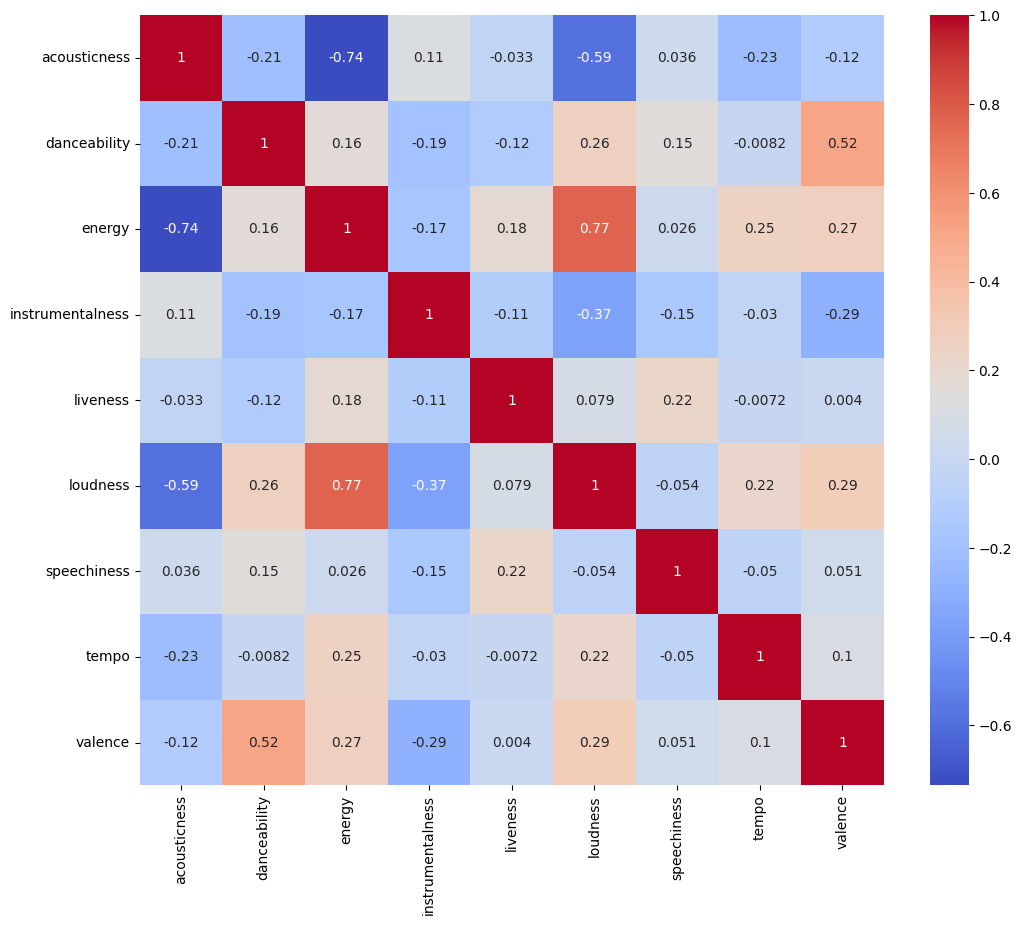

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_values_df = original_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_values_df.corr(), annot=True, cmap="coolwarm")
plt.show()